In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [3]:
import joblib

In [4]:
import math
import re
from wordcloud import WordCloud

# Data check

## Shape

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(913000, 4)
(45000, 4)


In [6]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [7]:
train.head().T

,0,1,2,3,4
date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
store,1,1,1,1,1
item,1,1,1,1,1
sales,13,11,14,13,10


In [8]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


## Info

In [9]:
def data_summary(data):
    summary = pd.DataFrame(data.dtypes, columns=['Dtype'])
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Count'] = data.shape[0]
    summary['Unique value'] = data.nunique().values
    summary['Null count'] = data.isnull().sum().values
    summary['Null percent'] = data.isnull().sum().values / len(data) * 100
    summary['Null percent'] = round(summary['Null percent'], 1)
    
    return summary

In [10]:
train_summary = data_summary(train)

In [11]:
test_summary = data_summary(test)

In [12]:
summary = pd.concat([train_summary, test_summary], axis=1, keys=['Train', 'Test'])
summary

Train                                                   Test           \
        Dtype     Count Unique value Null count Null percent   Dtype    Count   
date   object  913000.0       1826.0        0.0          0.0  object  45000.0   
store   int64  913000.0         10.0        0.0          0.0   int64  45000.0   
item    int64  913000.0         50.0        0.0          0.0   int64  45000.0   
sales   int64  913000.0        213.0        0.0          0.0     NaN      NaN   
id        NaN       NaN          NaN        NaN          NaN   int64  45000.0   

                                            
      Unique value Null count Null percent  
date          90.0        0.0          0.0  
store         10.0        0.0          0.0  
item          50.0        0.0          0.0  
sales          NaN        NaN          NaN  
id         45000.0        0.0          0.0

In [13]:
train.dtypes.value_counts()

int64     3
object    1
dtype: int64

In [14]:
test.dtypes.value_counts()

int64     3
object    1
dtype: int64

## 불필요 columns 제거

In [15]:
test.drop('id', axis=1, inplace=True)

In [16]:
train_summary = data_summary(train)

In [17]:
test_summary = data_summary(test)

In [18]:
summary = pd.concat([train_summary, test_summary], axis=1, keys=['Train', 'Test'])
summary

Train                                                 Test           \
        Dtype   Count Unique value Null count Null percent   Dtype    Count   
date   object  913000         1826          0          0.0  object  45000.0   
store   int64  913000           10          0          0.0   int64  45000.0   
item    int64  913000           50          0          0.0   int64  45000.0   
sales   int64  913000          213          0          0.0     NaN      NaN   

                                            
      Unique value Null count Null percent  
date          90.0        0.0          0.0  
store         10.0        0.0          0.0  
item          50.0        0.0          0.0  
sales          NaN        NaN          NaN

## 고유값 확인

In [19]:
for column in train.columns :
    print(f'{column} : {train[column].unique()}', '\n')

date : ['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-12-29' '2017-12-30'
 '2017-12-31'] 

store : [ 1  2  3  4  5  6  7  8  9 10] 

item : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] 

sales : [ 13  11  14  10  12   9   7   5  16  18  15   8   6  21  20  17  22  19
  24  23  26  25  27  38  34  29  31  30   4  36  28  33  32  37  35  43
  40  41  39  42  50  45  44  47  53  49  46  48  51  58  54  57  55  52
   3   2   1  59  56  60  63  69  64  67  65  71  61  73  62  82  78  68
  74  70  87  66  77  88  76  75 102  72  92  86  79  85  81  90  84  80
 103  97  96  95  89 104  94 100  91  83 106 101  98 115  93 111 119  99
 108 110 120 105 126 109 114 113 112 121 107 117 118 139 124 131 123 138
 134 127 136 116 125 122 128 150 129 135 137 132 133 145 130 144   0 148
 141 140 152 147 169 156 159 153 142 157 155 163 143 154 165 146 160 158
 151 164 171 161 177 162 175 181 168

In [20]:
summary[summary['Train']['Unique value'] != summary['Test']['Unique value']]

Train                                                 Test           \
        Dtype   Count Unique value Null count Null percent   Dtype    Count   
date   object  913000         1826          0          0.0  object  45000.0   
sales   int64  913000          213          0          0.0     NaN      NaN   

                                            
      Unique value Null count Null percent  
date          90.0        0.0          0.0  
sales          NaN        NaN          NaN

In [21]:
# One-hot-encoding 시 주의해야 할 column들
summary[(summary['Train']['Unique value'] != summary['Test']['Unique value'])
                        & (summary['Train']['Dtype'] == 'object')]

Train                                                 Test           \
       Dtype   Count Unique value Null count Null percent   Dtype    Count   
date  object  913000         1826          0          0.0  object  45000.0   

                                           
     Unique value Null count Null percent  
date         90.0        0.0          0.0

In [22]:
# 고유값이 너무 많은 column들
columns_many = summary[(summary['Train']['Unique value'] > 100) & (summary['Train']['Dtype'] == 'object')]
columns_many

Train                                                 Test           \
       Dtype   Count Unique value Null count Null percent   Dtype    Count   
date  object  913000         1826          0          0.0  object  45000.0   

                                           
     Unique value Null count Null percent  
date         90.0        0.0          0.0

In [23]:
list(columns_many.index)

['date']

## 결측치 확인

In [24]:
train_null = train_summary[train_summary['Null count'] > 0]

In [25]:
test_null = test_summary[test_summary['Null count'] > 0]

In [26]:
null_columns = pd.concat([train_null, test_null], axis=1, keys=['Train', 'Test'])
null_columns

Empty DataFrame
Columns: [(Train, Dtype), (Train, Count), (Train, Unique value), (Train, Null count), (Train, Null percent), (Test, Dtype), (Test, Count), (Test, Unique value), (Test, Null count), (Test, Null percent)]
Index: []

In [27]:
train[null_columns.index].dtypes.value_counts()

Series([], dtype: int64)

In [28]:
test[null_columns.index].dtypes.value_counts()

Series([], dtype: int64)

# 통계 및 분포 확인

## 수치형 data

In [29]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [30]:
columns_num = train.describe().columns

array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'item'}>],
       [<AxesSubplot:title={'center':'sales'}>, <AxesSubplot:>]],
      dtype=object)

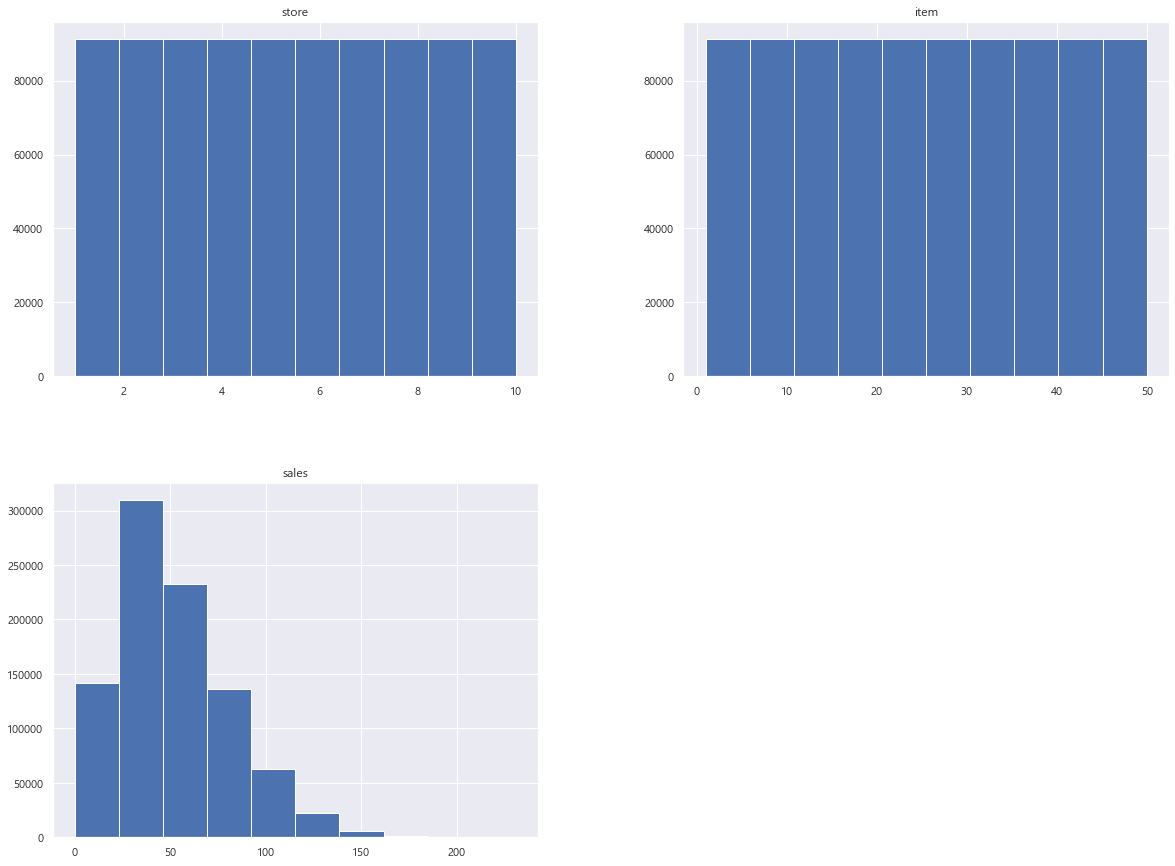

In [31]:
train[columns_num].hist(figsize=(20,15))

In [32]:
test.describe()

,store,item
count,45000.000000,45000.00000
mean,5.500000,25.50000
std,2.872313,14.43103
min,1.000000,1.00000
25%,3.000000,13.00000
50%,5.500000,25.50000
75%,8.000000,38.00000
max,10.000000,50.00000


In [33]:
columns_num = test.describe().columns

array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'item'}>]], dtype=object)

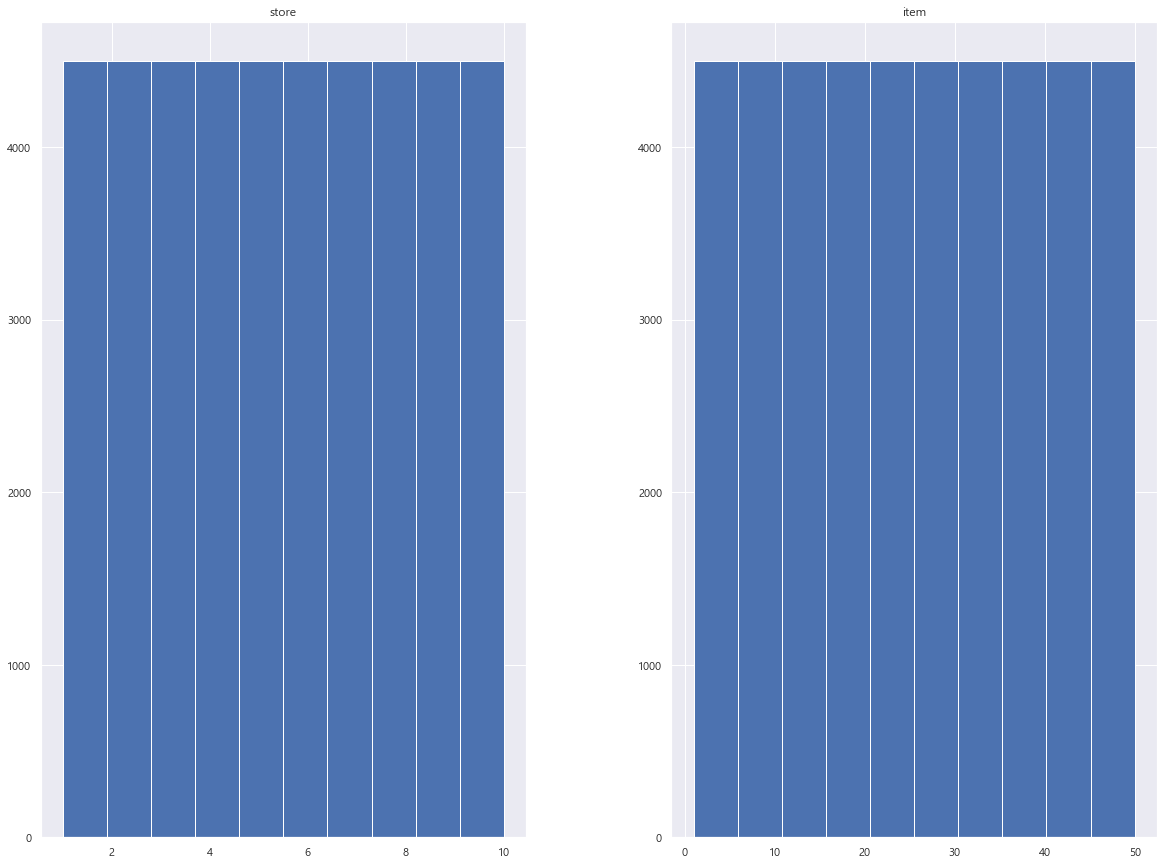

In [34]:
test[columns_num].hist(figsize=(20,15))

### 범주형 data 추출

In [35]:
columns_int = list(train.select_dtypes(include=['int64']).columns)
columns_int

['store', 'item', 'sales']

In [36]:
columns_int.remove('sales')

In [37]:
columns_float = list(train.select_dtypes(include=['float64']).columns)
columns_float

[]

In [38]:
columns_to_cat = columns_int + columns_float
columns_to_cat

['store', 'item']

### binary data 추출

In [39]:
columns_binary_num = list(train_summary[(train_summary['Dtype'] == 'int64') & (train_summary['Unique value'] == 2)].index)
columns_binary_num

[]

In [40]:
# columns_binary_num.remove('target')

In [41]:
joblib.dump(columns_binary_num, 'columns_binary_num.pkl')

['columns_binary_num.pkl']

## 범주형 data

In [42]:
columns_str = list(train.select_dtypes(include=['object']).columns)
columns_str

['date']

In [43]:
columns_bool = list(train.select_dtypes(include=['bool']).columns)
columns_bool

[]

In [44]:
columns_cat = columns_str + columns_bool + columns_to_cat
columns_cat

['date', 'store', 'item']

In [45]:
columns_dt = ['date']

In [46]:
for column in columns_dt :
    columns_cat.remove(column)

In [47]:
joblib.dump(columns_cat, 'columns_cat.pkl')

['columns_cat.pkl']

In [48]:
joblib.dump(columns_dt, 'columns_dt.pkl')

['columns_dt.pkl']

### train data

In [49]:
# value값을 20개 이하로 가지는 column을 선택
# value값이 너무 많으면 countplot을 그리는데 시간이 너무 많이 소요됨
columns_cat_count = []

for column in columns_cat :
    
    if len(train[column].value_counts()) <= 20 :
        columns_cat_count.append(column)

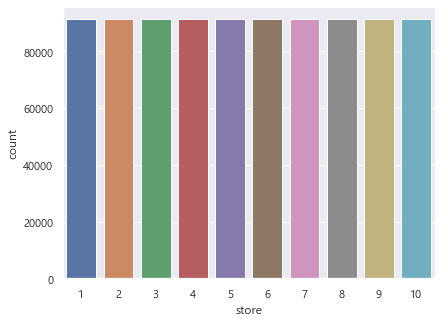

In [50]:
k = len(columns_cat_count)
m = math.ceil(k / 2)

plt.figure(figsize=(16, 5 * m))
grid = plt.GridSpec(m, 2, wspace=0.4, hspace=0.3)

for i in range(k) :    
    ax = plt.subplot(grid[i])
    sns.countplot(data=train, x=columns_cat_count[i], ax=ax)

### test data

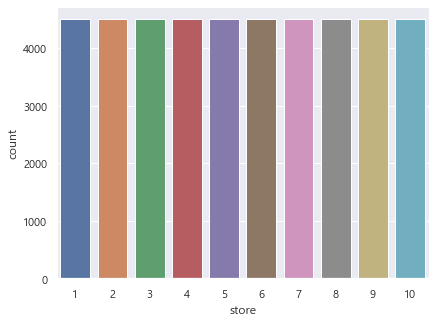

In [51]:
k = len(columns_cat_count)
m = math.ceil(k / 2)

plt.figure(figsize=(16, 5 * m))
grid = plt.GridSpec(m, 2, wspace=0.4, hspace=0.3)

for i in range(k) :    
    ax = plt.subplot(grid[i])
    sns.countplot(data=test, x=columns_cat_count[i], ax=ax)

### 전체 dataset

In [52]:
data_total = pd.concat([train, test], axis=0, ignore_index=True)
data_total.loc[:len(train), 'dataset'] = 'Train'
data_total.loc[len(train):, 'dataset'] = 'Test'

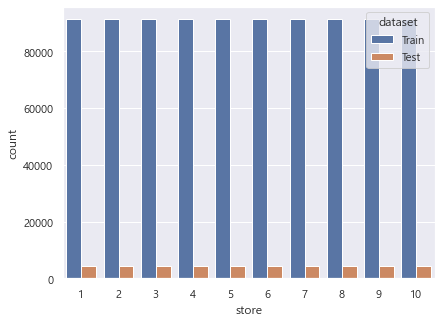

In [53]:
k = len(columns_cat_count)
m = math.ceil(k / 2)

plt.figure(figsize=(16, 5 * m))
grid = plt.GridSpec(m, 2, wspace=0.4, hspace=0.3)

for i in range(k) :    
    ax = plt.subplot(grid[i])
    sns.countplot(data=data_total, x=columns_cat_count[i], hue='dataset', ax=ax)

### binary data 추출

In [54]:
columns_binary_cat = list(train_summary[(train_summary['Dtype'] == 'object') & (train_summary['Unique value'] == 2)].index)
columns_binary_cat

[]

In [55]:
# columns_binary_cat.remove('target')

In [56]:
joblib.dump(columns_binary_cat, 'columns_binary_cat.pkl')

['columns_binary_cat.pkl']